In [137]:
from google.colab import drive
 
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


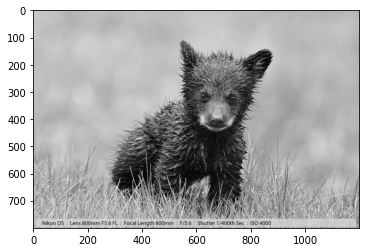

In [138]:
import numpy as np
import cv2 as cv
import random
import math
from matplotlib import pyplot as plt
img_address = "drive/My Drive/Colab Notebooks/fbimg.jpg"
img = cv.imread(img_address, 0)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [139]:
# calculate histogram of the given image
def caclculate_histo(img):
    histo = np.zeros(256, np.int32)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            histo[img[i][j]] += 1
    A_o,A_b = 0,0
    obj,back = 0,0
    for i in range(0, 150):
      if histo[i]>obj:
        A_o = i
        obj= histo[i]
    for i in range(150, 256):
      if histo[i]>back:
        A_b = i
        back = histo[i] 
    plt.plot(histo)
    plt.show()  
    return histo , A_o, A_b

In [140]:
def calculate_params(A_o, A_b):
  vback = float(1.0/(np.sqrt(2*math.pi)*A_b))
  vobj = float(1.0/(np.sqrt(2*math.pi)*A_o))
  theta = float(A_o*vobj/(A_o*vobj + A_b*vback))
  t=np.abs(int(((np.power(vobj,2)/(A_b - A_o)) * np.log(float((1-theta)/theta)))-float((A_o + A_b) / 2)))
  print("Calculated t value is : {}".format(t))
  return t

In [141]:
def segmentation(img , t):
  background_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  forground_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  for i in range(0 ,img.shape[0]) :
    for j in range(0 ,img.shape[1]) :
      if img[i][j]>t:
        background_img[i][j] = 0
        forground_img[i][j] = 255
      else :
        background_img[i][j] = 255
        forground_img[i][j] = 0
  result = np.hstack([background_img,forground_img])
  plt.title("Background vs Forground image")
  plt.imshow(result, cmap=plt.get_cmap('gray'))
  plt.show()
  return background_img , forground_img

In [142]:
def image_segmentation(img):
  histo , A_o, A_b = caclculate_histo(img)
  t = calculate_params(A_o, A_b)
  background_img , forground_img = segmentation(img , t)

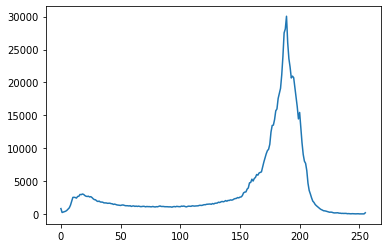

Calculated t value is : 103


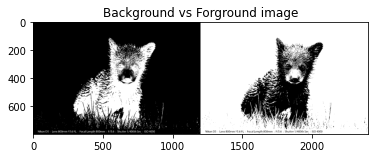

In [143]:
image_segmentation(img)